In [1]:
import pandas as pd, numpy as np
from fidap import fidap_client
import config

In [2]:
fidap = fidap_client(db="sf_gcp", api_key=config.FIDAP_API_KEY)

In [3]:
def factor_analysis(factor: str):
    """
    Function to return the Dataframe of percent change in share price by 10 groups based on a factor.
    """
    df = fidap.sql(f"""
    SELECT AVG("pc_1d")*100 as "return",
       "group_no"
    FROM
      (SELECT "ticker", "date", "pc_1d",
                            "{factor}",
                            NTILE(10) OVER(
                                           ORDER BY "{factor}" DESC) AS "group_no"
       FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers"
       WHERE "marketcap" > 100000000 AND "{factor}" IS NOT NULL) AS tmp
    GROUP BY "group_no"
    ORDER BY "group_no";""")
    return df

# Factor investing analysis

Market factors, such as momentum and value, ...

## Further reading

Here are some great resources on further reading around factor investing:

 - [Investopedia - Factor Investing](https://www.investopedia.com/terms/f/factor-investing.asp)
 - [Fidelity](https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/fidelity/fidelity-overview-of-factor-investing.pdf)
    

## Marketcap Factor 1D Returns

Let's do a query that splits tickers into deciles based on their market cap. We can use the built in SQL function NTILE ([Snowflake docs](https://docs.snowflake.com/en/sql-reference/functions/ntile.html)). After we split the companies into deciles (called `group_no`), we then group them, take the average return at the decile level, and order by the `group_no`.

In [4]:
df_marketcap = factor_analysis('marketcap')

In [5]:
df_marketcap

,return,group_no
0,0.685939,1
1,1.390293,2
2,1.933486,3
3,2.017940,4
4,2.048810,5
5,1.926863,6
6,2.284330,7
7,1.688838,8
8,1.619584,9
9,0.898265,10


<AxesSubplot:xlabel='group_no'>

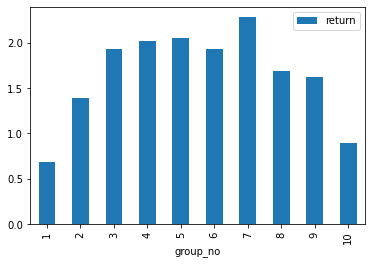

In [6]:
df_marketcap.plot.bar(x="group_no", y="return")

## Value Factor (Profit/Sales Ratio)

In [7]:
df_value = factor_analysis('ps')

In [8]:
df_value

,return,group_no
0,2.000043,1
1,1.424927,2
2,0.890377,3
3,1.386495,4
4,1.582594,5
5,1.770505,6
6,1.652787,7
7,2.020553,8
8,2.174264,9
9,2.490652,10


<AxesSubplot:xlabel='group_no'>

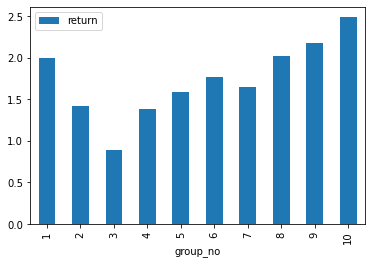

In [9]:
df_value.plot.bar(x="group_no", y="return")

## Volatility

In [10]:
df_volatility = factor_analysis('std_3m')

In [11]:
df_volatility

,return,group_no
0,3.143049,1
1,1.895677,2
2,1.684095,3
3,1.826295,4
4,1.666827,5
5,1.761985,6
6,1.664021,7
7,1.447909,8
8,0.997332,9
9,0.413340,10


<AxesSubplot:xlabel='group_no'>

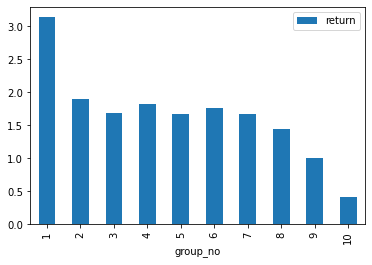

In [12]:
df_volatility.plot.bar(x="group_no", y="return")

## Momentum Factor

In [19]:
df_momentum = factor_analysis('pc_3m')

In [20]:
df_momentum

,return,group_no
0,3.638376,1
1,2.543547,2
2,2.201091,3
3,1.973415,4
4,1.707371,5
5,1.365437,6
6,1.207114,7
7,0.868381,8
8,0.666832,9
9,0.727130,10


<AxesSubplot:xlabel='group_no'>

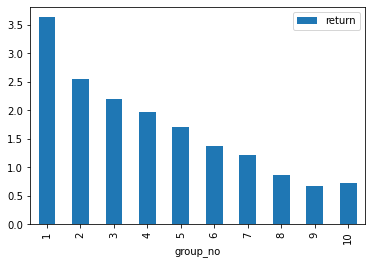

In [21]:
df_momentum.plot.bar(x="group_no", y="return")

## Profit Margin

In [34]:
df_pm = factor_analysis('netmargin')

In [35]:
df_pm

,return,group_no
0,1.379264,1
1,1.581088,2
2,1.171560,3
3,1.716752,4
4,1.742737,5
5,2.284795,6
6,1.913076,7
7,1.644083,8
8,1.548276,9
9,2.387907,10


<AxesSubplot:xlabel='group_no'>

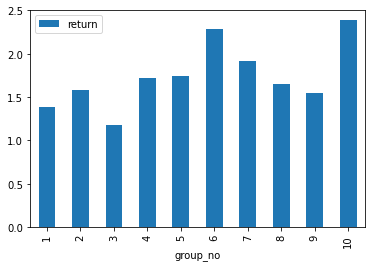

In [36]:
df_pm.plot.bar(x="group_no", y="return")

## Payout Ratio

In [25]:
df_por = factor_analysis('payoutratio')

In [26]:
df_por

,return,group_no
0,1.277892,1
1,1.608878,2
2,1.732615,3
3,1.797449,4
4,1.941666,5
5,1.957582,6
6,1.635948,7
7,1.913082,8
8,1.820574,9
9,1.878864,10


<AxesSubplot:xlabel='group_no'>

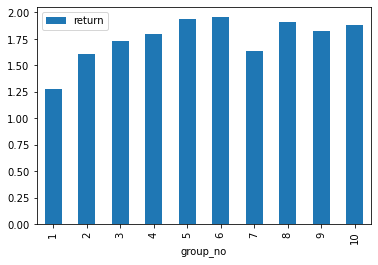

In [27]:
df_por.plot.bar(x="group_no", y="return")

## Dividend Yield

In [28]:
df_yield = factor_analysis('divyield')

In [29]:
df_yield

,return,group_no
0,1.407241,1
1,1.910957,2
2,1.797499,3
3,1.886800,4
4,1.645774,5
5,1.934561,6
6,1.659019,7
7,1.771238,8
8,1.734682,9
9,1.385163,10


<AxesSubplot:xlabel='group_no'>

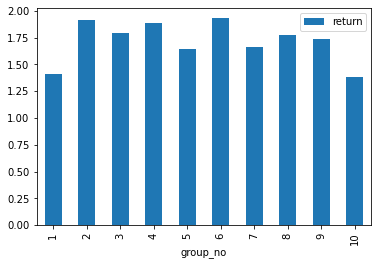

In [30]:
df_yield.plot.bar(x="group_no", y="return")

## Free Cash Flow

In [31]:
df_fcf = factor_analysis('fcf')

In [32]:
df_fcf

,return,group_no
0,1.209277,1
1,1.906347,2
2,1.975398,3
3,1.772452,4
4,1.564549,5
5,1.819929,6
6,1.145616,7
7,2.051436,8
8,2.035553,9
9,1.863092,10


<AxesSubplot:xlabel='group_no'>

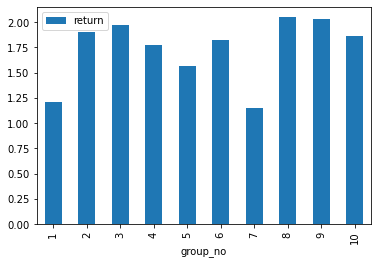

In [33]:
df_fcf.plot.bar(x="group_no", y="return")